# Problem 1, question c

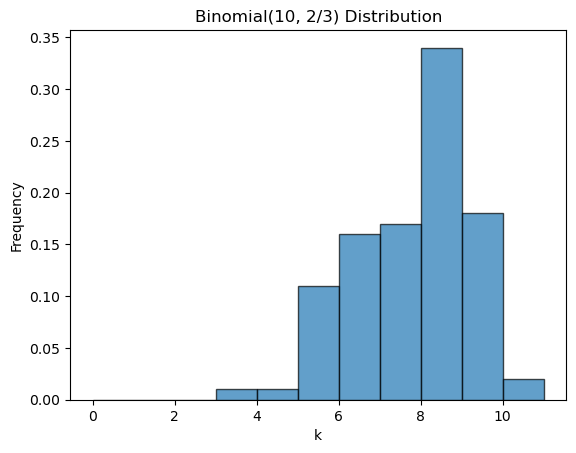

In [341]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_inverse_transform(n, p, num_samples=100):
    samples = []

    # Loop for samples
    for _ in range(num_samples):
        # Initialize
        F = 0
        k = 0
        prob_k = (1 - p)**n
        U = np.random.uniform()

        # While for probability
        while F < U:
            F += prob_k
            prob_k *= (n - k) / (k + 1) * p / (1 - p)
            k += 1
        
        samples.append(k)
    
    return samples

# Parameters
n = 10
p = 2/3

# Generate 100 samples
samples = binomial_inverse_transform(n, p, 100)

# Plot the distribution
plt.hist(samples, bins=range(n+2), density=True, edgecolor='k', alpha=0.7)
plt.title("Binomial(10, 2/3) Distribution")
plt.xlabel("k")
plt.ylabel("Frequency")
plt.show()

# Problem 2, question e

In [26]:
# Parameters
r = 2
p = 1/3

### Method 1 --> formula

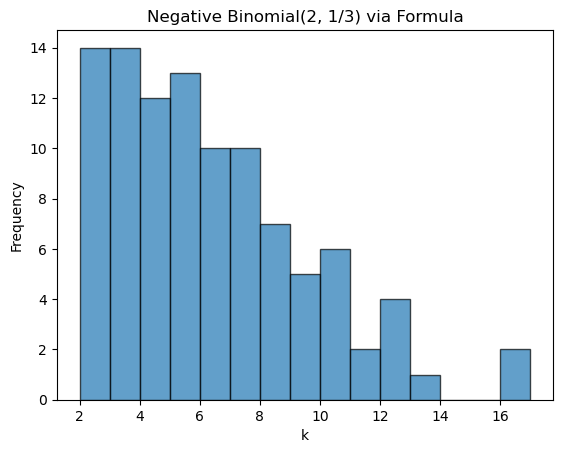

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def negative_binomial_recursive(r, p, num_samples=100):
    samples = []
    
    # Loop for samples
    for _ in range(num_samples):
        F = 0
        k = r
        prob_k = p**r  # p(k = r)
        
        U = np.random.uniform()
        
        # While for probability
        while F < U:
            F += prob_k
            if F >= U:
                break
            prob_k *= k * (1 - p) / (k + 1 - r)
            k += 1
        
        samples.append(k)
    
    return samples

# Generate 100 samples
samples_recursive = negative_binomial_recursive(r, p, 100)

# Plot the distribution
plt.hist(samples_recursive, bins=range(min(samples_recursive), max(samples_recursive)+2), edgecolor='k', alpha=0.7)
plt.title("Negative Binomial(2, 1/3) via Formula")
plt.xlabel("k")
plt.ylabel("Frequency")
plt.show()

### Method 2 --> geometric

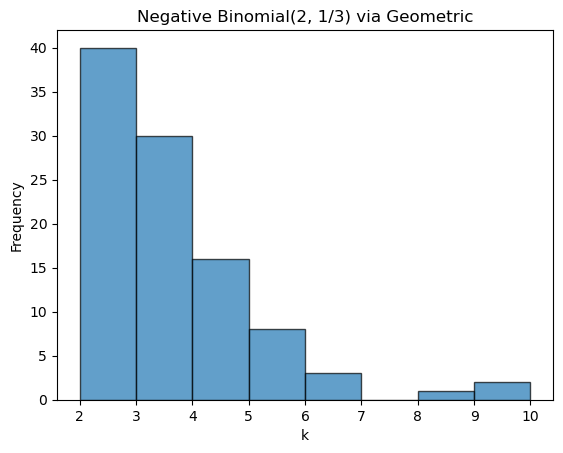

In [261]:
def gen_geo(p):
    win, count = 0, 1
    while win == 0:
        U = np.random.uniform()
        if U <= p:
            win = 1
        else :
            count += 1
    return count

def negative_binomial_geom(r, p, num_samples=100):
    samples = []

    # Loop for samples
    for _ in range(num_samples):
        total = 0

        # Genearating Geo(p)
        for _ in range(r):
            geom = gen_geo(p)
            total += geom
        samples.append(total)
    
    return samples

# Generate 100 samples
samples_geom = negative_binomial_geom(r, p, 100)

# Plot the distribution
plt.hist(samples_geom, bins=range(min(samples_geom), max(samples_geom)+2), edgecolor='k', alpha=0.7)
plt.title("Negative Binomial(2, 1/3) via Geometric")
plt.xlabel("k")
plt.ylabel("Frequency")
plt.show()

### Method 3 --> bernoulli

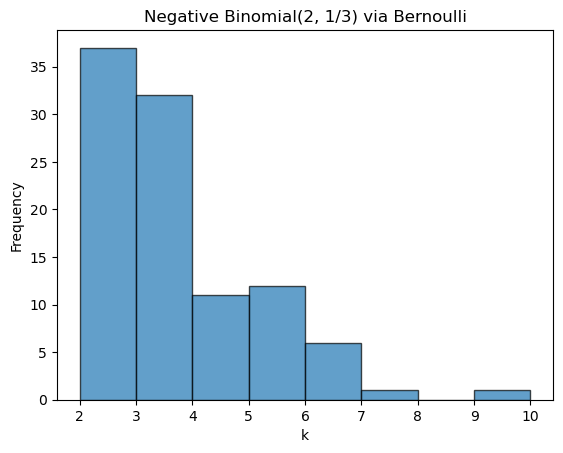

In [263]:
def negative_binomial_bernoulli(r, p, num_samples=100):
    samples = []

    # Loop for samples
    for _ in range(num_samples):
        successes = 0
        trials = 0

        # While for probability
        while successes < r:
            if np.random.uniform() <= p:
                successes += 1
            trials += 1
        samples.append(trials)
    
    return samples

# Generate 100 samples
samples_bernoulli = negative_binomial_bernoulli(r, p, 100)

# Plot the distribution
plt.hist(samples_bernoulli, bins=range(min(samples_bernoulli), max(samples_bernoulli)+2), edgecolor='k', alpha=0.7)
plt.title("Negative Binomial(2, 1/3) via Bernoulli")
plt.xlabel("k")
plt.ylabel("Frequency")
plt.show()

# Problem 3

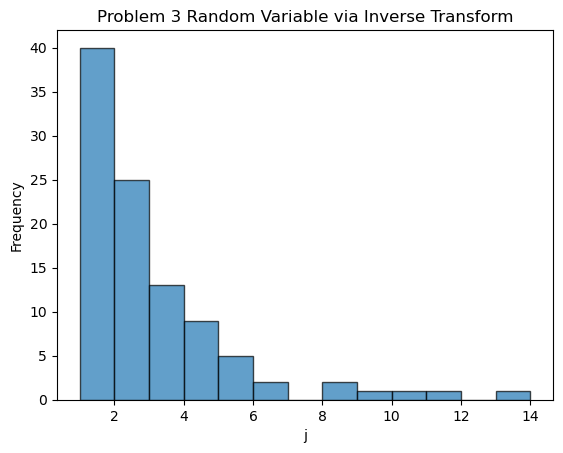

In [371]:
import numpy as np
import matplotlib.pyplot as plt

def compute_p(j):
    prob = (1/2)**(j+1) + (1/2)*(2**(j - 1)) / (3**j)
    return prob

def inverse_transform(num_samples=100):
    samples = []

    # Loop for samples
    for _ in range(num_samples):
        U = np.random.uniform()
        F = 0 
        j = 1

        # While for probability
        while F < U: 
            prob = compute_p(j)
            F += prob
            if F < U:
                j += 1
        samples.append(j)
    
    return samples

# Parameters
num_samples = 100

# Generate samples
samples = inverse_transform(num_samples)

# Plot the distribution
plt.hist(samples, bins=range(min(samples), max(samples)+2), edgecolor='k', alpha=0.7)
plt.title("Problem 3 Random Variable via Inverse Transform")
plt.xlabel("j")
plt.ylabel("Frequency")
plt.show()


# Problem 4

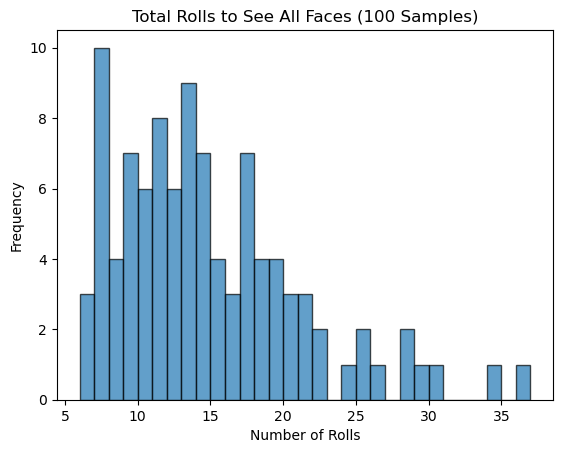

In [183]:
import numpy as np
import matplotlib.pyplot as plt

def inverse_transform(num_samples):
    samples = []

    # Loop for samples
    for _ in range(num_samples):
        dice = {i: 0 for i in range(1, 7)}
        k = 0

        # While for probability
        while 0 in dice.values():
            U = np.random.uniform()
            throw = int(np.floor(6 * U)) + 1
            
            if dice[throw] == 0:
                dice[throw] = 1
            
            k += 1
        
        samples.append(k)
    
    return samples

# Parameters
num_samples = 100

# Generate samples
samples = inverse_transform(num_samples)

# Plot the distribution of the total number of rolls
plt.hist(samples, bins=range(min(samples), max(samples)+2), edgecolor='k', alpha=0.7)
plt.title("Total Rolls to See All Faces (100 Samples)")
plt.xlabel("Number of Rolls")
plt.ylabel("Frequency")
plt.show()


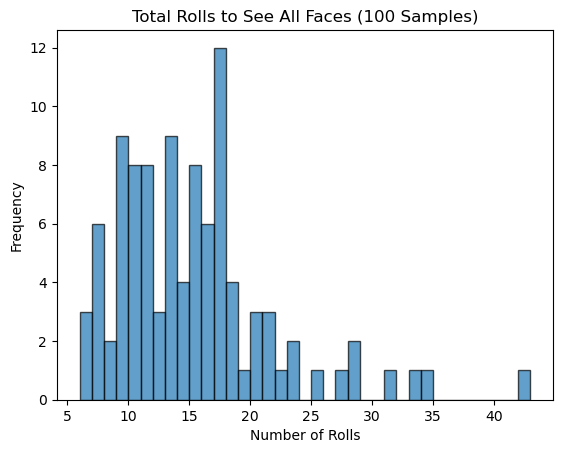

In [270]:
import numpy as np
import matplotlib.pyplot as plt

def inverse_transform(num_samples):
    samples = []

    # Loop for samples
    for _ in range(num_samples):
        faces = set()
        k = 0

        # While for probability
        while len(faces) < 6:  # Continue rolling until all six faces have appeared
            U = np.random.uniform()
            throw = int(np.floor(6 * U)) + 1
            faces.add(throw) 
            k += 1
        
        samples.append(k)
    
    return samples

# Parameters
num_samples = 100

# Generate 100 samples
samples = inverse_transform(num_samples)

# Plot the distribution of the total number of rolls
plt.hist(samples, bins=range(min(samples), max(samples)+2), edgecolor='k', alpha=0.7)
plt.title("Total Rolls to See All Faces (100 Samples)")
plt.xlabel("Number of Rolls")
plt.ylabel("Frequency")
plt.show()
